In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
import tensorflow as tf

from cnn_normalize import prepare_data, normalize_data, prepare_sequences, split_train_and_test_data, get_cnn_data
from utils.chart import config_chart
from constants import SP500_TICKER

tf.keras.backend.clear_session()

---

## For **prepare_data** function

(5959, 18)
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Change          float64
Direction         int64
MA10            float64
MA20            float64
MA50            float64
MA100           float64
RSI             float64
Stochastic_K    float64
Stochastic_D    float64
Target            int32
Low_Shadow      float64
High_Shadow     float64
dtype: object


,Open,High,Low,Close,Adj Close,Volume,Change,Direction,MA10,MA20,MA50,MA100,RSI,Stochastic_K,Stochastic_D,Target,Low_Shadow,High_Shadow
Date,,,,,,,,,,,,,,,,,,
2000-05-24,1373.859985,1401.750000,1361.089966,1399.050049,1399.050049,1152300000,25.190063,1,1421.276001,1426.065509,1454.346997,1428.297998,44.368469,23.745746,29.372265,1,37.960083,2.699951
2000-05-25,1399.050049,1411.650024,1373.930054,1381.520020,1381.520020,984500000,-17.530029,0,1418.646997,1421.895508,1454.134597,1427.560999,41.539809,19.487574,22.178108,1,7.589966,30.130005
2000-05-26,1381.520020,1391.420044,1369.750000,1378.020020,1378.020020,722600000,-3.500000,0,1414.353003,1418.175006,1452.525598,1427.346998,40.978078,22.968362,22.067228,0,8.270020,13.400024
2000-05-30,1378.020020,1422.449951,1378.020020,1422.449951,1422.449951,844200000,44.429932,1,1411.362000,1415.885004,1451.685198,1427.550398,50.186817,30.103998,24.186645,0,44.429932,0.000000
2000-05-31,1422.439941,1434.489990,1415.500000,1420.599976,1420.599976,960500000,-1.839966,0,1406.817993,1414.600500,1450.964597,1427.721898,49.838139,42.021155,31.697838,1,5.099976,13.890015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,4894.160156,4020430000,7.500000,1,4816.775049,4781.978076,4677.269023,4507.758813,72.932465,92.601030,93.015869,0,24.820312,3.989746
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,4890.970215,3353400000,2.060059,1,4827.848047,4787.447583,4686.857432,4511.510815,72.142640,90.749789,91.389010,0,9.500000,15.719727
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,4927.930176,3525160000,34.979980,1,4842.258057,4794.676587,4695.502031,4515.821816,75.458828,95.820406,93.057075,0,40.530273,1.379883


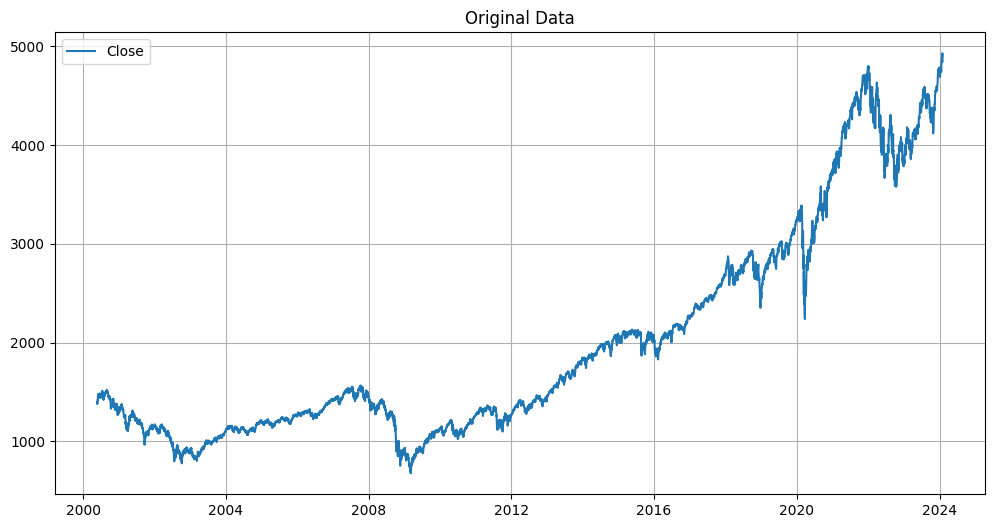

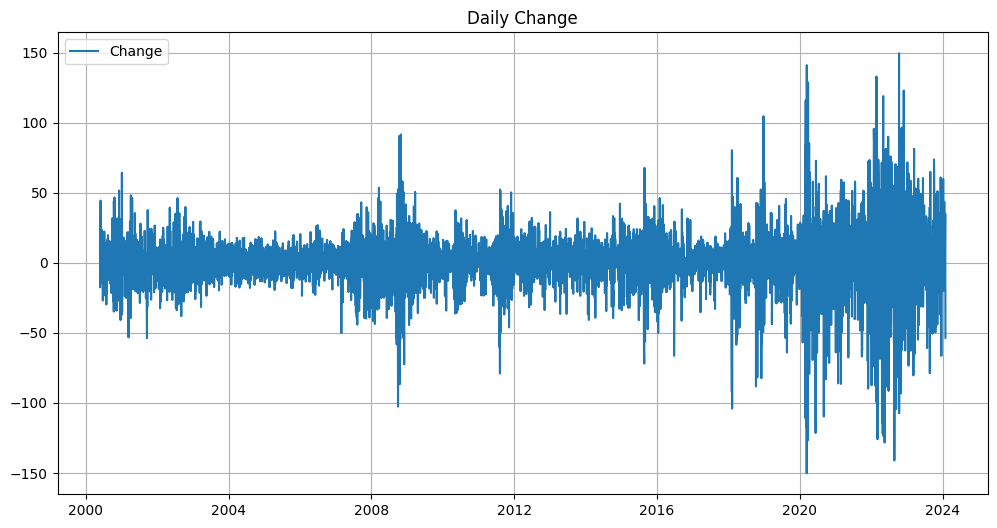

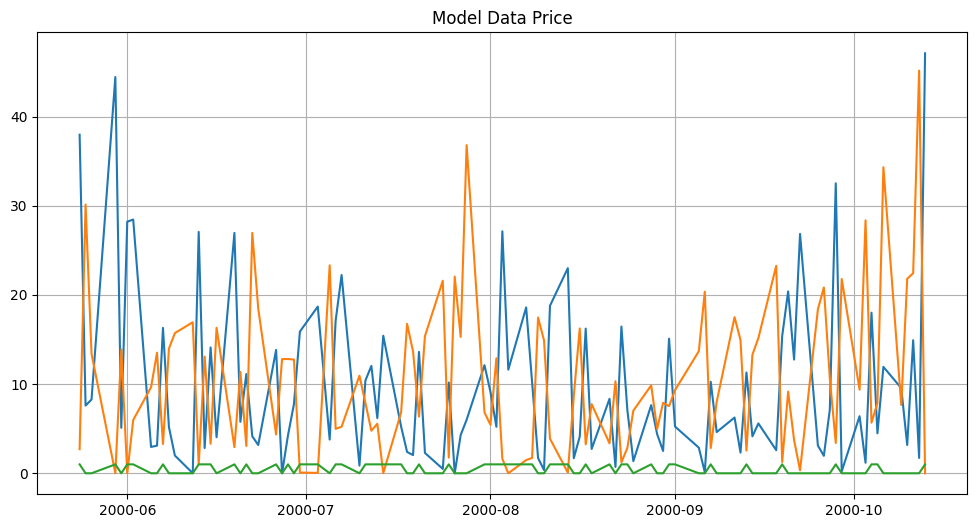

In [3]:
data = prepare_data(SP500_TICKER)


# Show data
print(data.shape)
print(data.dtypes)

plt = config_chart('Original Data')
plt.plot(data.Close)
plt.legend(['Close'])

plt = config_chart('Daily Change')
plt.plot(data.Change)
plt.legend(['Change'])


test = data['Close'] - data['Low']
tets2 = data['High'] - data['Close']

plt = config_chart('Model Data Price')
plt.plot(test [0:100])
plt.plot(tets2[0:100])
plt.plot(data.Direction[0:100])

data

---

## For **normalize_data** function

In [4]:
data = normalize_data(data)


# Show data
# plt = config_chart('Normalized Data')
# plt.plot(data)
# plt.legend(['Open', 'High', 'Low', 'Close'])

data

,Open,High,Low,Close,Adj Close,Volume,Change,Direction,MA10,MA20,MA50,MA100,RSI,Stochastic_K,Stochastic_D,Target,Low_Shadow,High_Shadow
Date,,,,,,,,,,,,,,,,,,
2000-05-24,0.163561,0.166787,0.163385,0.169949,0.169949,0.071731,0.585169,1.0,0.171442,0.169285,0.169667,0.160142,0.420674,0.230958,0.288498,1.0,0.173611,0.014974
2000-05-25,0.169493,0.169124,0.166406,0.165825,0.165825,0.056614,0.442655,0.0,0.170810,0.168261,0.169613,0.159946,0.381951,0.187973,0.215044,1.0,0.034713,0.167101
2000-05-26,0.165365,0.164348,0.165423,0.165002,0.165002,0.033020,0.489459,0.0,0.169778,0.167347,0.169203,0.159889,0.374261,0.223111,0.213912,0.0,0.037823,0.074317
2000-05-30,0.164541,0.171674,0.167369,0.175453,0.175453,0.043975,0.649353,1.0,0.169059,0.166784,0.168989,0.159943,0.500326,0.295143,0.235552,0.0,0.203201,0.000000
2000-05-31,0.175001,0.174516,0.176189,0.175018,0.175018,0.054452,0.494997,0.0,0.167967,0.166469,0.168805,0.159989,0.495553,0.415443,0.312243,1.0,0.023325,0.077034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,0.990762,0.992223,0.988956,0.992057,0.992057,0.330118,0.526155,1.0,0.987496,0.993712,0.991477,0.981642,0.811709,0.926033,0.938314,0.0,0.113516,0.022127
2024-01-26,0.991292,0.994240,0.991811,0.991306,0.991306,0.270026,0.508007,1.0,0.990158,0.995056,0.993922,0.982643,0.800896,0.907345,0.921704,0.0,0.043448,0.087182
2024-01-29,0.992243,0.999580,0.993206,1.000000,1.000000,0.285499,0.617828,1.0,0.993621,0.996831,0.996127,0.983793,0.846294,0.958531,0.938735,0.0,0.185366,0.007653


----

## For **prepare_sequences** function

(5958, 8)
(5958,)
[0.1714421  0.16928538 0.16966729 0.16014225 1.         1.
 0.17361125 0.01497394]
2000-05-24T00:00:00.000000000
(5958,)
(5958,)
[0. 0. 1. ... 1. 0. 0.]
2000-05-25T00:00:00.000000000


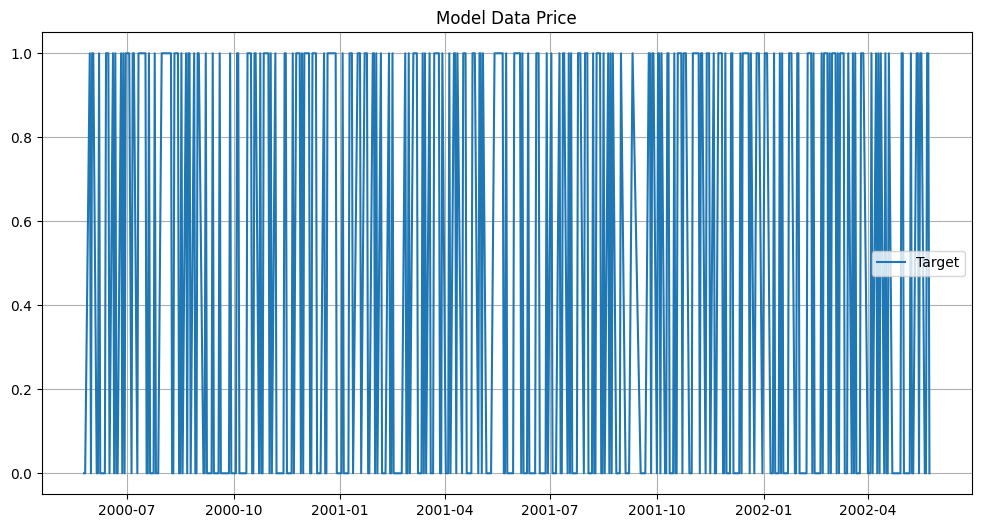

In [5]:
indicators, indicators_dates, target, target_dates = prepare_sequences(data)

# # Show data
print(indicators.shape)
print(indicators_dates.shape)
print(indicators[0])
print(indicators_dates[0])

print(target.shape)
print(target_dates.shape)
print(target)
print(target_dates[0])

plt = config_chart('Model Data Price')
plt.plot(target_dates[0:500], target[0:500])
plt.legend(['Target'])


---

## For **split_train_and_test_data** function

(4766, 8)
(4766,)
(596, 8)
(596,)
(596, 8)
(596,)


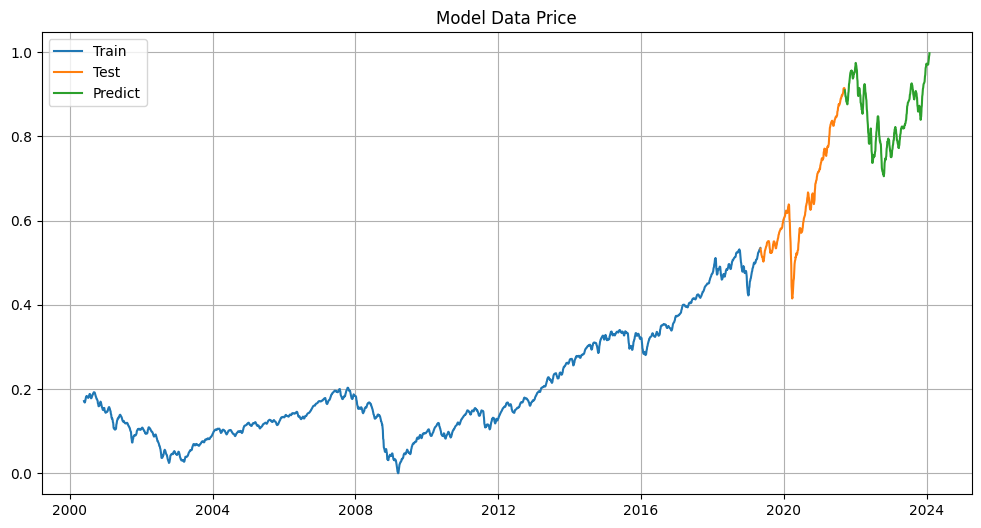

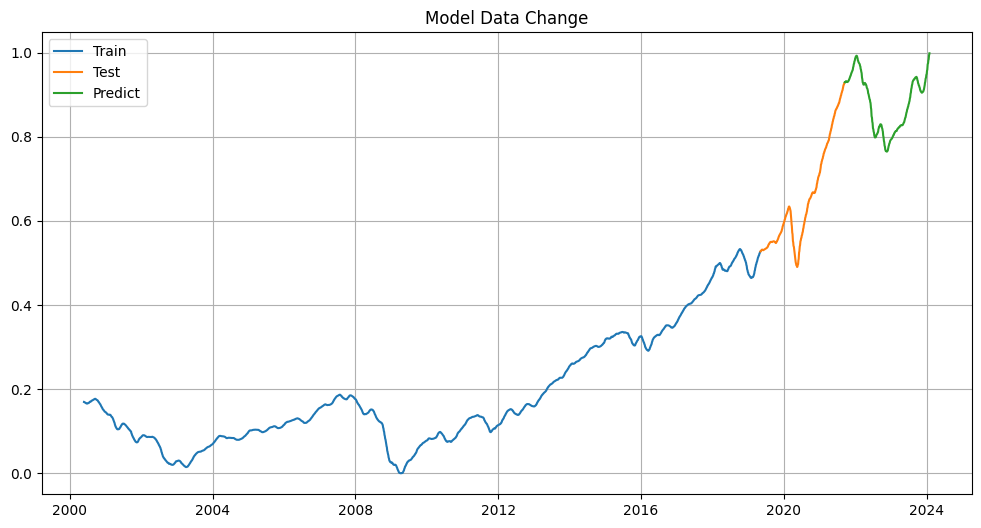

In [6]:
train, test, predict = split_train_and_test_data(indicators, target, indicators_dates, target_dates)


# Show data:
print(train["x"].shape)
print(train["y"].shape)

print(test["x"].shape)
print(test["y"].shape)

print(predict["x"].shape)
print(predict["y"].shape)

plt = config_chart('Model Data Price')
plt.plot(train['x_dates'], train['x'][:, 0])
plt.plot(test['x_dates'], test['x'][:, 0])
plt.plot(predict['x_dates'], predict['x'][:, 0])
plt.legend(['Train', 'Test', 'Predict'])

plt = config_chart('Model Data Change')
plt.plot(train['x_dates'], train['x'][:, 2])
plt.plot(test['x_dates'], test['x'][:, 2])
plt.plot(predict['x_dates'], predict['x'][:, 2])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **get_lstm_data** function

In [7]:
train, test, predict = get_cnn_data(SP500_TICKER)

In [8]:
print(train["x"].shape) 
print(train["x"])

print(train["y"].shape)
print(train["y"])


(4766, 8)
[[0.1714421  0.16928538 0.16966729 ... 1.         0.17361125 0.01497394]
 [0.17081026 0.16826096 0.16961313 ... 1.         0.03471287 0.16710108]
 [0.16977827 0.16734697 0.16920286 ... 0.         0.03782311 0.07431657]
 ...
 [0.53332111 0.53399686 0.52523331 ... 1.         0.07784142 0.07853091]
 [0.5342971  0.53481062 0.52610415 ... 1.         0.07514264 0.0122578 ]
 [0.53488592 0.53529863 0.5268171  ... 0.         0.15668889 0.02689865]]
(4766,)
[0. 0. 1. ... 1. 1. 0.]


In [9]:
print(test["x"].shape) 
print(test["x"])

print(test["y"].shape)
print(test["y"])

(596, 8)
[[0.53369315 0.53515467 0.52726557 ... 1.         0.09810181 0.16072304]
 [0.53254363 0.53516966 0.52770171 ... 1.         0.02808093 0.1028231 ]
 [0.53121098 0.53495482 0.52810123 ... 1.         0.15696357 0.02911651]
 ...
 [0.91383107 0.92099435 0.92769444 ... 0.         0.10532721 0.13454742]
 [0.91177044 0.92054404 0.92815704 ... 1.         0.03471231 0.23642814]
 [0.91076151 0.92094472 0.92885653 ... 0.         0.19359752 0.0342184 ]]
(596,)
[0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 0

In [10]:
print(predict["x"].shape) 
print(predict["x"])

print(predict["y"].shape)
print(predict["y"])

(596, 8)
[[0.90955167 0.92184729 0.92944617 ... 1.         0.13697786 0.0672182 ]
 [0.90705316 0.92218128 0.93001821 ... 1.         0.02392166 0.21368628]
 [0.90278242 0.92115023 0.92995793 ... 1.         0.23699907 0.25079142]
 ...
 [0.99015759 0.99505552 0.99392244 ... 0.         0.04344845 0.08718164]
 [0.99362081 0.99683143 0.99612671 ... 0.         0.18536607 0.00765283]
 [0.99744189 0.99873704 0.99827928 ... 0.         0.03979053 0.03393948]]
(596,)
[0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 0

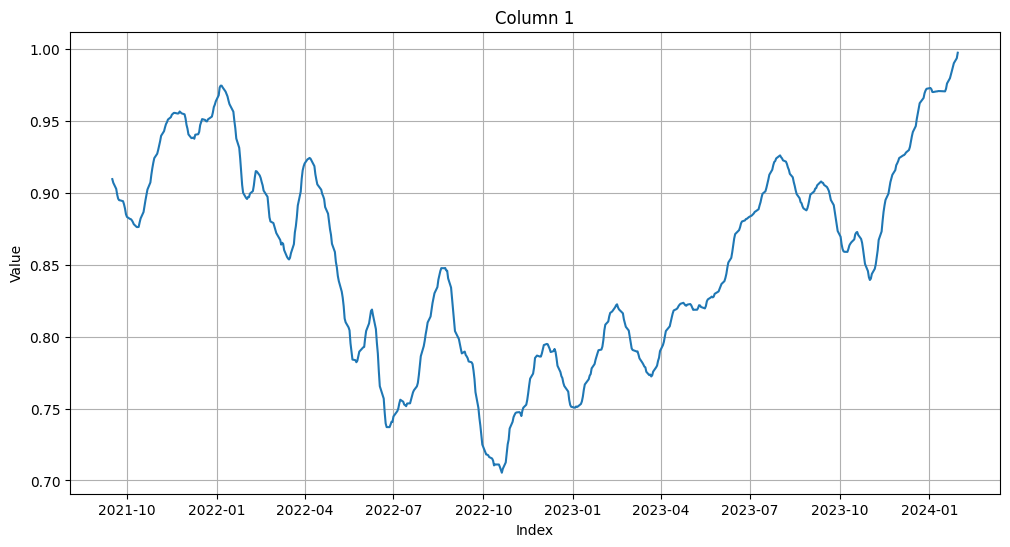

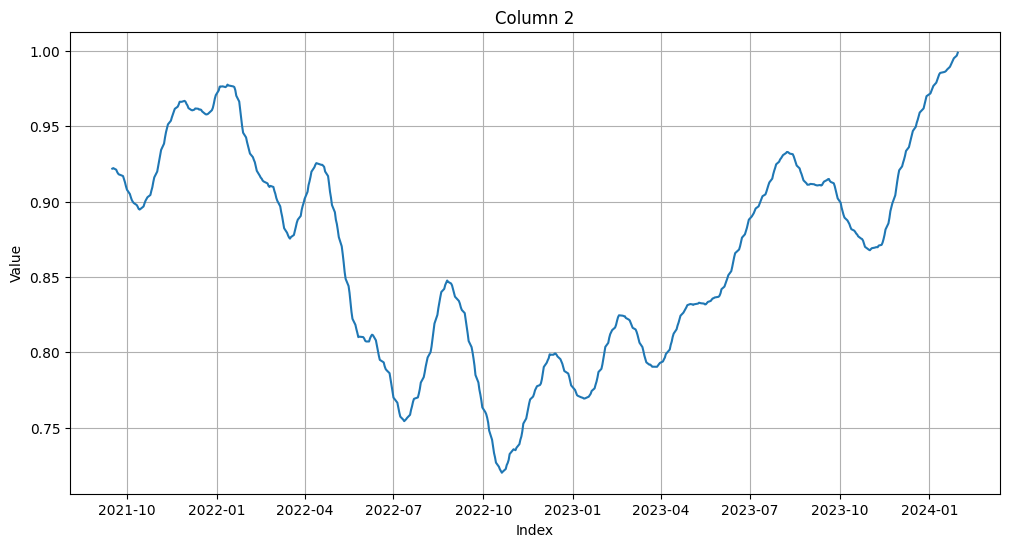

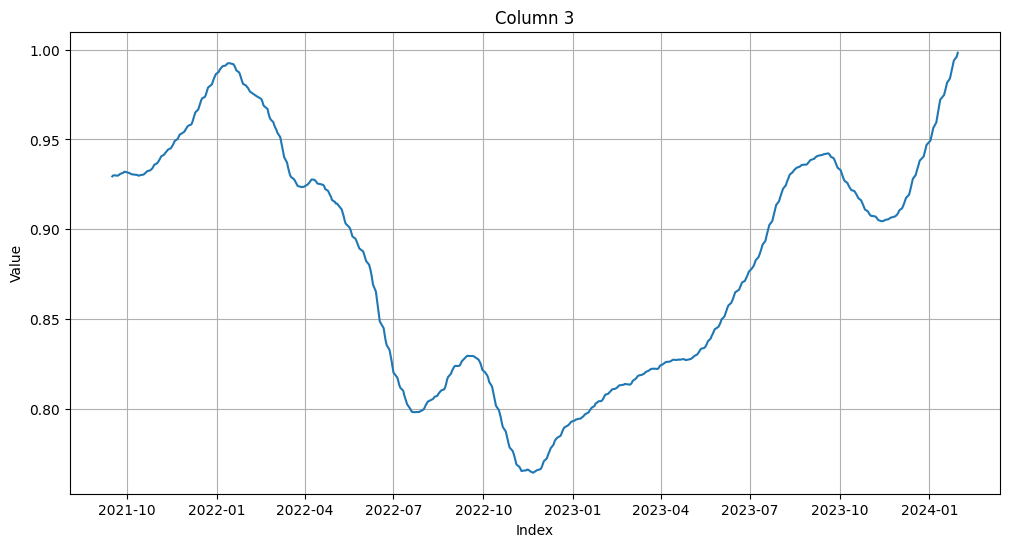

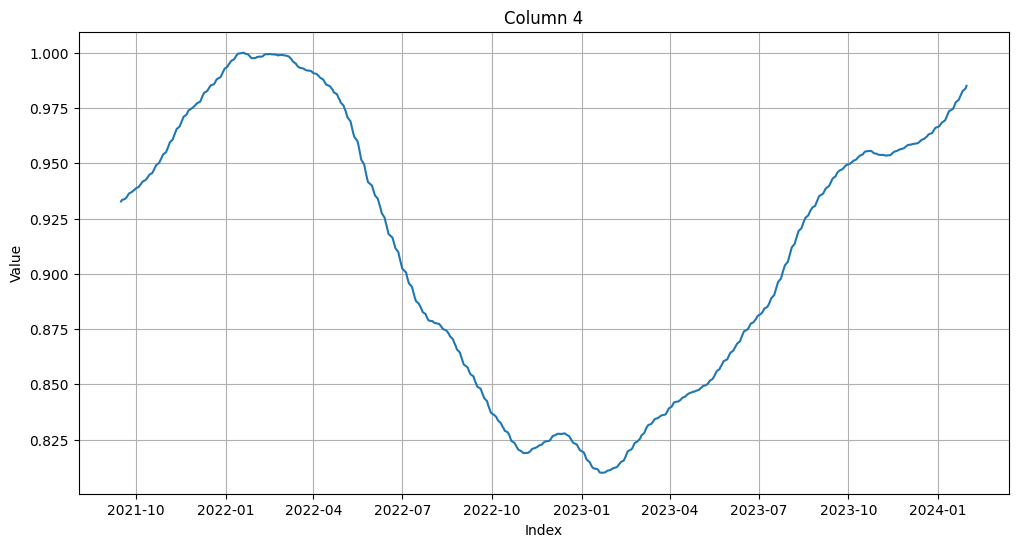

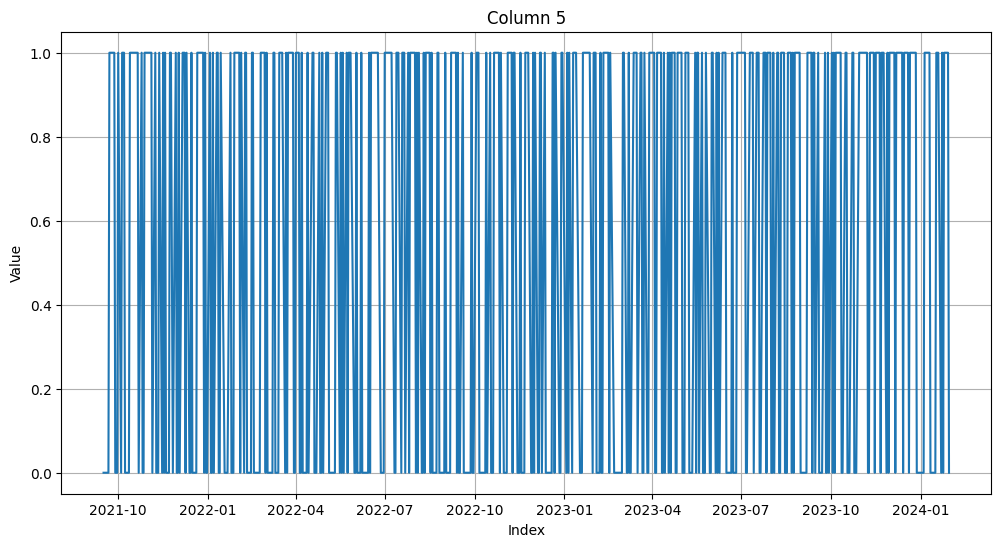

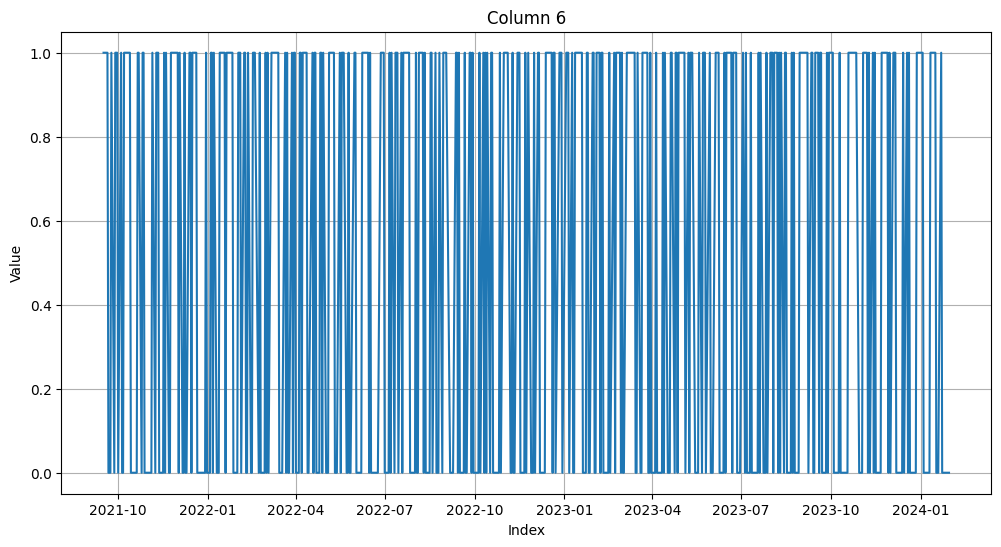

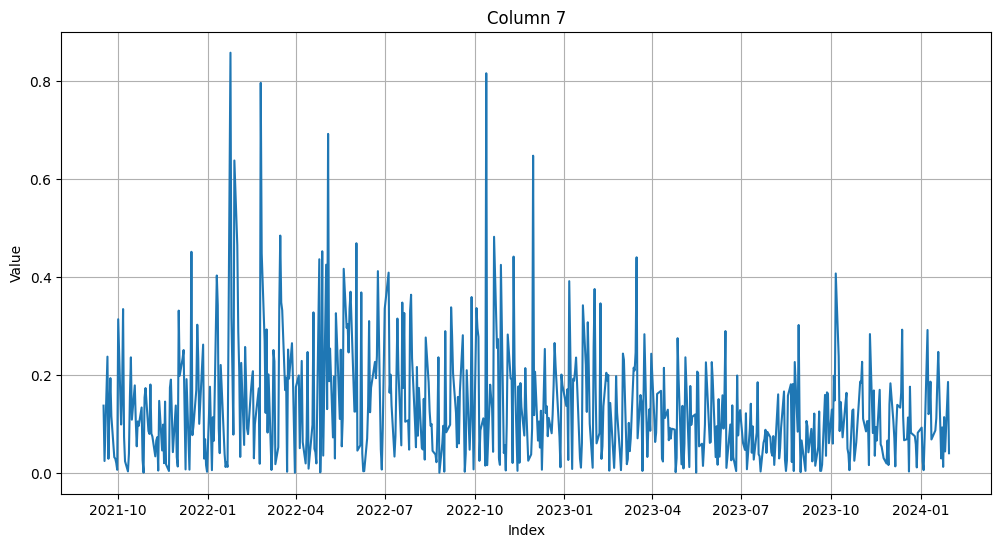

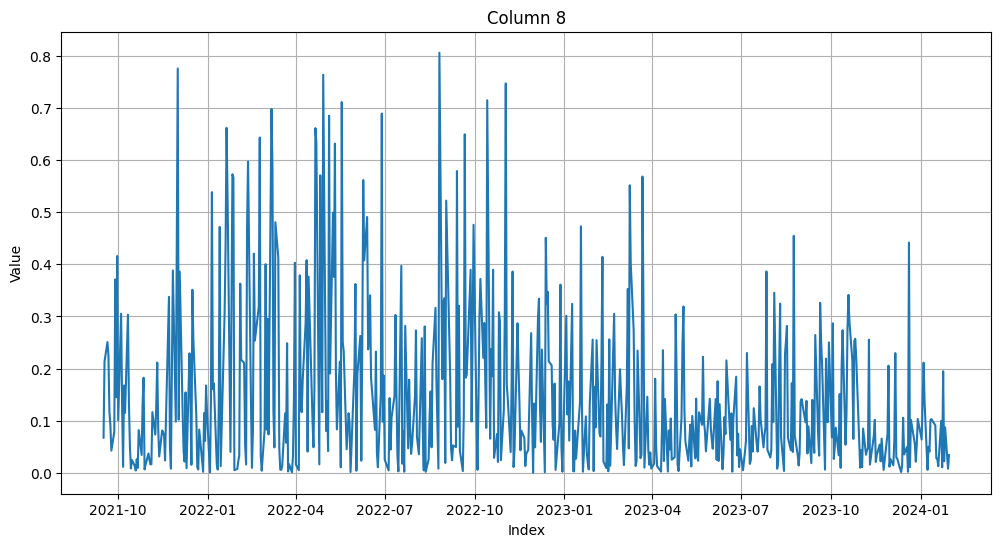

In [11]:
num_columns = predict["x"].shape[1]  # Get the number of columns
for i in range(num_columns):
    plt = config_chart('Model Data')
    plt.plot(predict['x_dates'], predict["x"][:, i])
    plt.title(f'Column {i+1}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()